In [73]:
import pandas as pd

In [74]:
data = pd.read_csv('Naturaldisaster.csv')
data = data.fillna(0)
data.head()


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,0,Natural,Hydrological,Flood,0,0,0,...,0.0,0.0,0.0,0.0,25000.0,15.001282,0,0,0,0
1,1970-0109-AUS,1970,109,0,Natural,Meteorological,Storm,Tropical cyclone,0,Ada,...,0.0,0.0,0.0,0.0,72475.0,15.001282,0,0,0,0
2,1970-0044-BEN,1970,44,0,Natural,Hydrological,Flood,0,0,0,...,0.0,0.0,0.0,0.0,200.0,15.001282,0,0,0,0
3,1970-0063-BGD,1970,63,0,Natural,Meteorological,Storm,Tropical cyclone,0,0,...,0.0,3648000.0,0.0,0.0,86400.0,15.001282,0,0,0,0
4,1970-0026-BGD,1970,26,0,Natural,Meteorological,Storm,0,0,0,...,0.0,110.0,0.0,0.0,0.0,15.001282,0,0,0,0


In [75]:
data.tail()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
14639,2021-0449-YEM,2021,449,FL-2021-000110,Natural,Hydrological,Flood,0,0,0,...,0.0,67980.0,0.0,0.0,0.0,0.0,0,0,0,0
14640,2021-0075-ZAF,2021,75,0,Natural,Hydrological,Flood,0,0,0,...,0.0,400.0,0.0,0.0,75000.0,0.0,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
14641,2021-0599-COD,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,0,Meningitis,...,0.0,301.0,0.0,0.0,0.0,0.0,0,0,0,0
14642,2021-0020-SRB,2021,20,0,Natural,Hydrological,Flood,0,0,0,...,0.0,22.0,0.0,0.0,0.0,0.0,1,25374;25378;25379;25380;25383;25386;25397,0,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."
14643,2021-0481-SSD,2021,481,0,Natural,Hydrological,Flood,0,0,0,...,0.0,500000.0,0.0,0.0,0.0,0.0,0,0,0,0


In [76]:

data = data.iloc[:,[36,42]]

In [77]:
data

,No Affected,CPI
0,0.0,15.001282
1,0.0,15.001282
2,0.0,15.001282
3,3648000.0,15.001282
4,110.0,15.001282
...,...,...
14639,67980.0,0.000000
14640,400.0,0.000000
14641,0.0,0.000000
14642,22.0,0.000000


In [78]:
import matplotlib.pyplot as plt

x = data.iloc[:,0]
y = data.iloc[:,1]

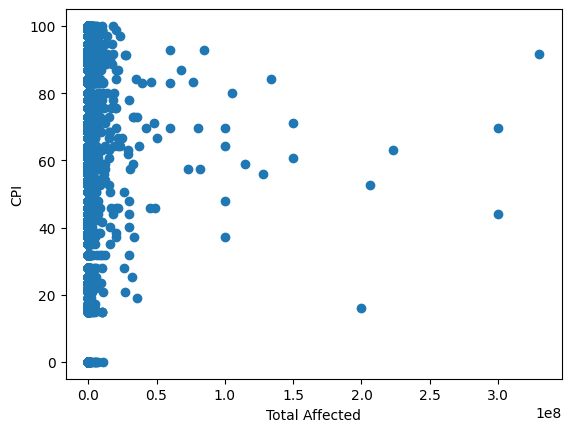

In [79]:
plt.scatter(x,y)
plt.xlabel('Total Affected')
plt.ylabel('CPI')
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

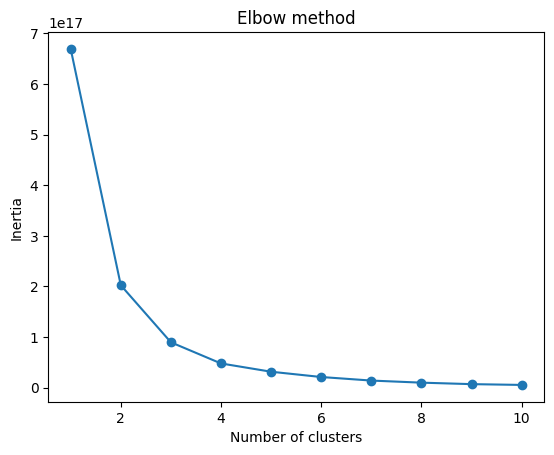

In [80]:
from sklearn.cluster import KMeans

data = list(zip(x,y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


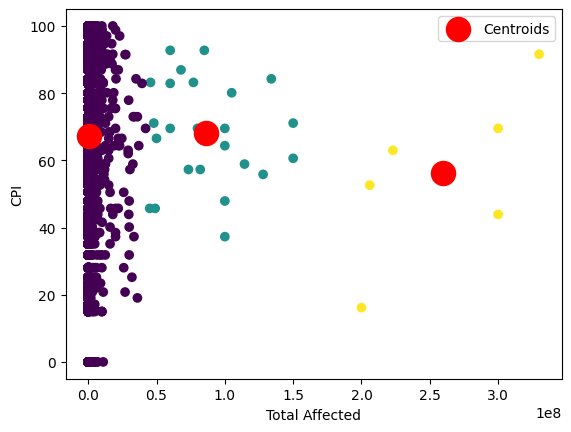

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)


plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel('Total Affected')
plt.ylabel('CPI')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

In [83]:
print("INFERENCE: No matter how prepared you are, you will die!!!")

INFERENCE: No matter how prepared you are, you will die!!!
